#   Numerical investigation of an oscillator
We consider a particle of mass $m = 1$ moving on the horizontal $x$ axis in a potential $U=\omega_{0}^2 x^{2}/2$,
subject to a friction force $F_{friction}=-2\gamma \dot{x}$ and a driving force $F_{driving}=\alpha\cos(t+\phi)$. The equation of motion is therefore of the general form

\begin{equation} \ddot{x}+2\gamma \dot{x}+ \omega_0^2x-\alpha\cos(t+\phi)=0  \qquad(1)\end{equation}

This is a harmonic oscillator with damping (friction) and driving. We want to study the solutions of this equation in terms of the free parameters of the problem. These are the initial position $x_{0}$, the initial velocity $\dot{x}_{0}$, the frequency $\omega_{0}$, and the parameters $\gamma$, $\alpha$, and $\phi$. Once we have the
solution we want to produce plots of the position, the velocity, the potential and kinetic energy,and the phase portrait (velocity in terms of position).
### - First step:
By denoting the velocity $v$ (i.e. $v = \dot{x}$), rewrite (1) as a system of first order ODEs in $x$ and $v$.



$\begin{equation}
\begin{cases}
\frac{dv}{dt}=v\\
\frac{dv}{dt}=-2\gamma v-\omega_{0}^2x+\alpha cos(t+\phi)
\end{cases}
\end{equation}$

### - Second step:  
Let $\{t_k \}$ be a partition of $[0,60]$ such that $0=t_0<t_1<\cdots<t_{600}=60$ and $H$ be the constant length of the $k$-th subinterval (i.e. $H = t_k -t_{k-1}$).

Using <b>odeint</b>, write a Python function named <b>Oscillator_func</b> which takes $x_{0}$, $\dot{x}_{0}$, $\omega_{0}$, $\gamma$, $\alpha$ and  $\phi$ as inputs and return the arrays $x$ and $v$ (numerical solution of the system of ODEs obtained above) such that for a given index $k$ we have $x[k]= x(t_k)$ and $v[k] = v(t_k)$



In [ ]:
import os
os.getcwd()

'/home/modeste/Desktop/Extended/CM/1 extended quiz CM'

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

def Oscillator_func(IN_put,t):
    x0,v=IN_put
    omega0=0.8
    gamma=0
    alpha=0
    phi=10
    dxdt=v
    dvdt=-2*gamma*v-omega0**2*x0+alpha*math.cos(t+phi)
    return np.array([dxdt,dvdt])


IN_put=[5,0]
t=np.linspace(0,60,600)
xv=odeint(Oscillator_func,IN_put,t)
xk=xv[:,0]
vk=xv[:,1]

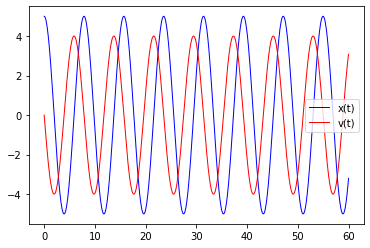

In [ ]:
plt.plot(t,xk, linestyle='-', color='blue', linewidth=1, label="x(t)")
plt.plot(t, vk,linestyle='-', color='red', linewidth=1, label="v(t)")
plt.legend()
plt.show()

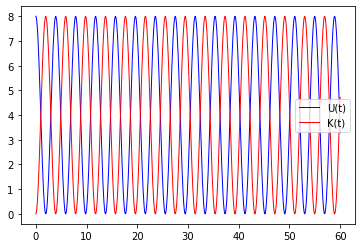

In [ ]:
#omega0=0.8
m=1
U=np.zeros((len(t),1))
K=np.zeros((len(t),1))
for i in range(len(t)):
    U[i]=(omega0**2*xk[i]**2)/2
    K[i]=(m*vk[i]**2)/2
    
    
    
plt.plot(t,U, linestyle='-', color='blue', linewidth=1, label="U(t)")
plt.plot(t,K,linestyle='-', color='red', linewidth=1, label="K(t)")
plt.legend()
plt.show()

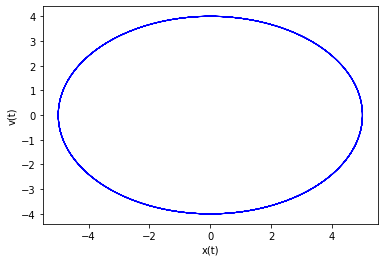

In [ ]:
plt.plot(xk,vk, linestyle='-', color='blue', linewidth=1)
plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.show()

### - Third step: 
You can then play with the numerical values ($x_{0}$, $\dot{x}_{0}$, $\omega_{0}$, $\gamma$, $\alpha$, $\phi$) to investigate different situations. From now on, we assume that

 \begin{equation} x_{0}=5,\qquad \dot{x}_{0}=0,\qquad \omega_{0}=0.8,\qquad \phi=10.\end{equation} 
 
 
write a code which produces the following three graphs:

 - First graph:
position $x(t)$ and velocity $\dot{x}(t)$, both as a function of time.

 - Second graph: 
 potential energy $U(t)$ and kinetic energy $K(t)$, both as a function of time.
 
 - Third graph: 
 a parametric plot representing the position $x(t)$ in terms of the position $\dot{x}(t)$.
 
 #### a- for  $\alpha=0, \gamma=0$ (Harmonic oscillator)
 
This is the usual harmonic oscillator, with the position and the velocity oscillating for ever, as you
can see on this plot:
 
 <img src="files/xv.png" width="500" height="500">
 
 The kinetic energy $K$ and the potential energy $U$ both oscillate for ever, and the total energy $E = K + U$ is equal to a constant at any time. This is conservation of energy.
 
 <img src="files/pk.png" width="500" height="500">
 
 
 The phase portrait is closed, and the trajectories go for ever around this ellipse representing pairs
of points $x(t)$ and $\dot{x}(t)$. We see that $x(t)$ and $\dot{x}(t)$ never reach $0$.

<img src="files/pt.png" width="500" height="500">


#### b- for  $\alpha=0, \gamma=0.1$ (Damped oscillator)


In this case we have $\gamma^2 < \omega_{0}^2$, which corresponds to the under-damped regime discussed in class. The solution has an oscillatoray behavior with an exponential damping, as you can see on this
plot:
<img src="files/xv2.png" width="500" height="500">

Es expected, the mechanical energy is not conserved because of friction (this is why the motion
eventually stops). You can see on this plot that energy goes to zero:

<img src="files/pk2.png" width="500" height="500">

In the phase portrait the trajectory starts at $x_{0}=5$ and $\dot{x}_{0}=0$, which is our initial condition, and
is attracted to the point $x = 0$ and $\dot{x}=0$. This is consistent with what we see above on the plots
of $x(t)$ and $\dot{x}(t)$.
<img src="files/pp1.png" width="500" height="500">


In [ ]:
def Oscillator_func(IN_put,t):
    x0,v=IN_put
    omega0=0.8
    gamma=0.1
    alpha=0
    phi=10
    dxdt=v
    dvdt=-2*gamma*v-omega0**2*x0+alpha*math.cos(t+phi)
    return np.array([dxdt,dvdt])


IN_put=[5,0]
t=np.linspace(0,60,600)
xv1=odeint(Oscillator_func,IN_put,t)
xk1=xv1[:,0]
vk1=xv1[:,1]

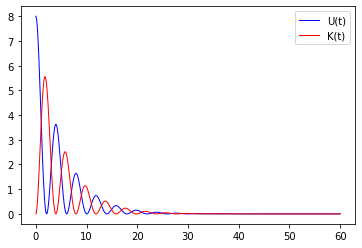

In [ ]:
m=1
U=np.zeros((len(t),1))
K=np.zeros((len(t),1))
for i in range(len(t)):
    U[i]=(omega0**2*xk1[i]**2)/2
    K[i]=(m*vk1[i]**2)/2
    
    
    
plt.plot(t,U, linestyle='-', color='blue', linewidth=1, label="U(t)")
plt.plot(t,K,linestyle='-', color='red', linewidth=1, label="K(t)")
plt.legend()
plt.show()

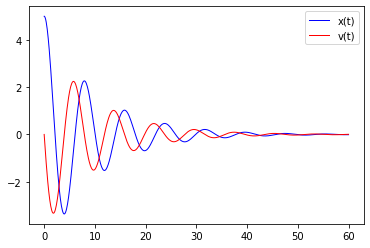

In [ ]:
plt.plot(t,xk1, linestyle='-', color='blue', linewidth=1, label="x(t)")
plt.plot(t, vk1,linestyle='-', color='red', linewidth=1, label="v(t)")
plt.legend()
plt.show()

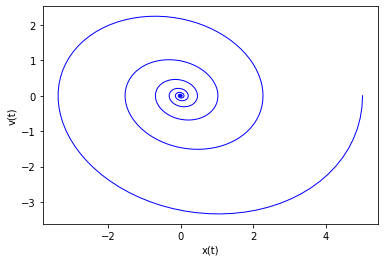

In [ ]:
plt.plot(xk1,vk1, linestyle='-', color='blue', linewidth=1)
plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.show()

#### c- for  $\alpha=1, \gamma=0.1$ (Damped oscillator with driving) 

In this case the motion is initially damped, as in the previous case, but after some time the driving force takes over and becomes dominant, so the motion is again oscillatory, where the oscillations are dictated by the driving. This can be seen on the plot.
<img src="files/dv1.png" width="500" height="500">

The energy is initially decreasing, as in the damped case, but then the driving starts to inject energy in the system, so energy increases once again and starts to oscillate between kinetic and potential.

<img src="files/dv2.png" width="500" height="500">
In the phase portrait the trajectory starts at $x_{0}=5$ and $\dot{x}_{0}=0$, which is our initial condition. It is initially attracted to the center, because of the damping as in the previous case, but then we see that the trajectory does not converge towards $(0, 0)$, but goes back to a stable circle.
<img src="files/dv3.png" width="500" height="500">

In [ ]:
def Oscillator_func(IN_put,t):
    x0,v=IN_put
    omega0=0.8
    gamma=0.1
    alpha=1
    phi=10
    dxdt=v
    dvdt=-2*gamma*v-omega0**2*x0+alpha*math.cos(t+phi)
    return np.array([dxdt,dvdt])


IN_put=[5,0]
t=np.linspace(0,60,600)
xv2=odeint(Oscillator_func,IN_put,t)
xk2=xv2[:,0]
vk2=xv2[:,1]

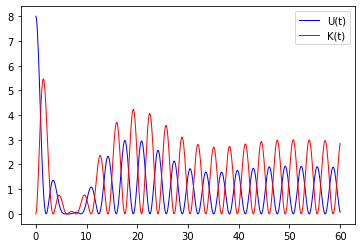

In [ ]:
m=1
U=np.zeros((len(t),1))
K=np.zeros((len(t),1))
for i in range(len(t)):
    U[i]=(omega0**2*xk2[i]**2)/2
    K[i]=(m*vk2[i]**2)/2
    
    
    
plt.plot(t,U, linestyle='-', color='blue', linewidth=1, label="U(t)")
plt.plot(t,K,linestyle='-', color='red', linewidth=1, label="K(t)")
plt.legend()
plt.show()

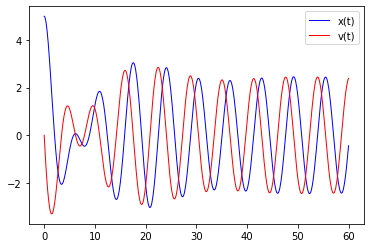

In [ ]:
plt.plot(t,xk2, linestyle='-', color='blue', linewidth=1, label="x(t)")
plt.plot(t, vk2,linestyle='-', color='red', linewidth=1, label="v(t)")
plt.legend()
plt.show()

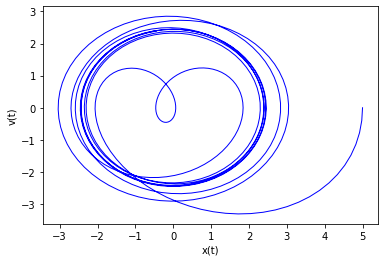

In [ ]:
plt.plot(xk2,vk2, linestyle='-', color='blue', linewidth=1)
plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.show()